# Статистика

In [1]:
from typing import List, Tuple
import matplotlib.pyplot as plt

## Квантили и распределение

In [2]:
def quantile(data: List[float], alpha: float) -> float:
    '''
    Calculate quantile

    Args:
        data (list[float]): List of values
        alpha (float): Quantile

    Returns:
        float: Value on an element in the list

    !TODO: add calculation when index is not integer
    '''

    data.sort()
    return data[int(alpha * len(data)) - 1]


def iqr(data: List[float]) -> float:
    '''
    Calculate IQR

    Args:
        data (list[float]): List of values

    Returns:
        float: Interquartile range
    '''

    return quantile(data, 0.75) - quantile(data, 0.25)


def extra_interval(data: List[float]) -> Tuple[float, float]:
    '''
    Calculate an interval of extra values

    Args:
        data (List[float]): List of values

    Returns:
        tuple[float, float]: Tuple of values. Lower and upper bounds
    '''

    return quantile(data, 0.25) - 1.5 * iqr(data), quantile(data, 0.75) + 1.5 * iqr(data)


def extra_values(data: List[float]) -> List[float]:
    '''
    Calculate extra values

    Args:
        data (list[float]): List of values

    Returns:
        extras (list[float]): List of extra values
    '''
    
    extras: List[float] = []
    interval = extra_interval(data)
    for item in data:
        if item > interval[1]:
            extras.append(item)
        elif item < interval[0]:
            extras.append(item)

    return extras

In [3]:
data = [42, 45, 47, 49, 52, 54, 55, 58, 60, 62, 65, 67, 68, 70, 71, 74, 77, 80, 92, 115]
print(extra_values(data))

[115]


In [4]:
data_sales = [4, 7, 13, 19, 25, 30, 33, 37, 38, 42, 47, 49, 58, 62, 68, 72]
print(quantile(data, 0.9))

80


In [5]:
data_employees = [-40, -24, -15, -13, -9, -6, -5, -3, -1, 0, 3, 5, 9, 11, 12, 13, 13, 14, 15, 18, 22, 25, 31, 33]
print(quantile(data_employees, 0.25), quantile(data_employees, 0.75))
q_25 = quantile(data_employees, 0.25)
q_75 = quantile(data_employees, 0.75)

print(q_25, q_75)

print("IQR:", iqr(data_employees))
print("Extra interval:", extra_interval(data_employees))
print("Extra values:", extra_values(data_employees))


-6 14
-6 14
IQR: 20
Extra interval: (-36.0, 44.0)
Extra values: [-40]


## Дисперсия

In [6]:
# Расчет характеристик погоды (температуры воздуха) в Москве
data_msk = [-6, -5, +3, +10, 18, +20, +24, +22, +16, +8, +1, -3]

mean = sum(data_msk) / len(data_msk)
print("Mean:", mean)

variance = sum((item - mean) ** 2 for item in data_msk) / (len(data_msk)-1)
print("Variance:", variance)

std = variance ** 0.5
print("Standard deviation:", std)


# Расчет характеристик погоды (температуры воздуха) в Тбилиси
data_tbs = [2.3, 3.1, 7.2, 12.7, 17.2, 21.7, 24.9, 24.7, 20.2, 14.2, 7.9, 3.7]

mean = sum(data_tbs)/len(data_tbs)
print("Mean:", mean)

variance = sum((item - mean) ** 2 for item in data_tbs) / (len(data_tbs)-1)
print("Variance:", variance)

std = variance ** 0.5
print("Standard deviation:", std)

Mean: 9.0
Variance: 119.27272727272727
Standard deviation: 10.92120539467724
Mean: 13.316666666666665
Variance: 71.14878787878787
Standard deviation: 8.434974088803585


## Взаимодействие переменных

In [7]:
cov = (400 + 1200 -100 + 1200 - 100 + 400) / 5
cov

600.0

In [8]:
# Задача. Рассчитать коэффициент ковариации для наблюдений

asset_a = [300, 320, 290, 350, 310]
asset_b = [150, 120, 180, 90, 160]

mean_a = sum(asset_a) / len(asset_a)
mean_b = sum(asset_b) / len(asset_b)

sum_mean_dev = 0
for item in range(len(asset_a)):
    print(item, ":", asset_a[item], ":", asset_b[item])
    part = (asset_a[item] - mean_a)*(asset_b[item] - mean_b)
    sum_mean_dev += part

cov_ab = sum_mean_dev / (len(asset_a) - 1)
cov_ab

0 : 300 : 150
1 : 320 : 120
2 : 290 : 180
3 : 350 : 90
4 : 310 : 160


-775.0

### Ковариация

***Задача***

*Дана информация о парах величин. Нарисуйте диаграммы рассеивания для каждой пары.*

*По графикам подберите подходящее значение коэффициента ковариации.*

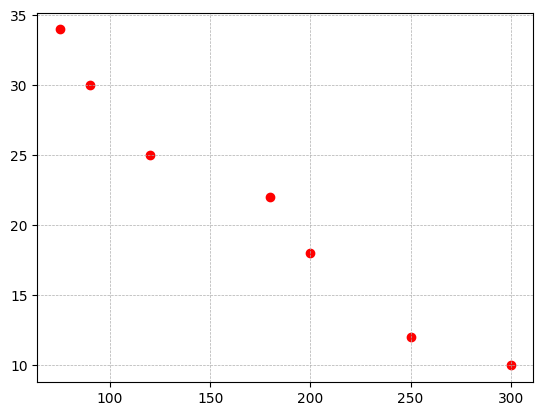

In [9]:
'''
Количество страниц в учебнике: 120, 200, 90, 300, 75, 180, 250.
Количество студентов, дочитавших учебник до конца: 25, 18, 30, 10, 34, 22, 12.
'''

data_a = [120, 200, 90, 300, 75, 180, 250]
data_b = [25, 18, 30, 10, 34, 22, 12]

plt.scatter(data_a, data_b, color='red')
plt.grid(color='#AEAEAE', linewidth=0.5, linestyle='--')
plt.show()


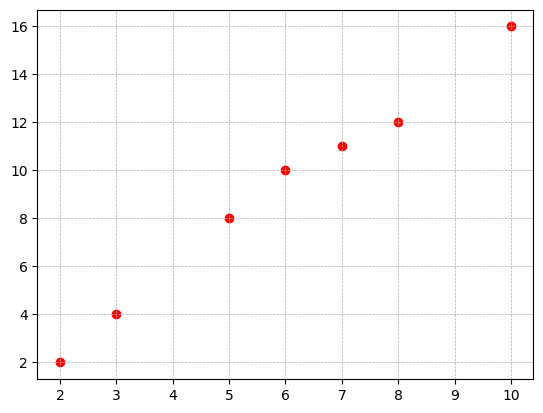

In [10]:
'''
Продолжительность подготовки к экзамену (часы): 2, 3, 5, 6, 7, 8, 10.
Количество решённых задач на экзамене: 2, 4, 8, 10, 11, 12, 16.
'''

data_a = [2, 3, 5, 6, 7, 8, 10]
data_b = [2, 4, 8, 10, 11, 12, 16]

plt.scatter(data_a, data_b, color='red')
plt.grid(color='#AEAEAE', linewidth=0.5, linestyle='--')
plt.show()

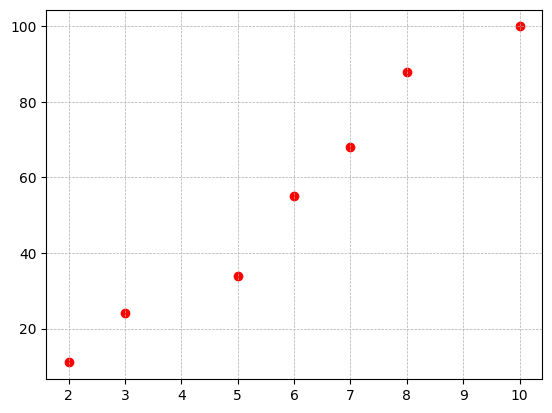

In [11]:
'''
Продолжительность подготовки к экзамену (часы): 2, 3, 5, 6, 7, 8, 10.
Количество набранных баллов: 11, 24, 34, 55, 68, 88, 100.
'''

data_a = [2, 3, 5, 6, 7, 8, 10]
data_b = [11, 24, 34, 55, 68, 88, 100]

plt.scatter(data_a, data_b, color='red')
plt.grid(color='#AEAEAE', linewidth=0.5, linestyle='--')
plt.show()

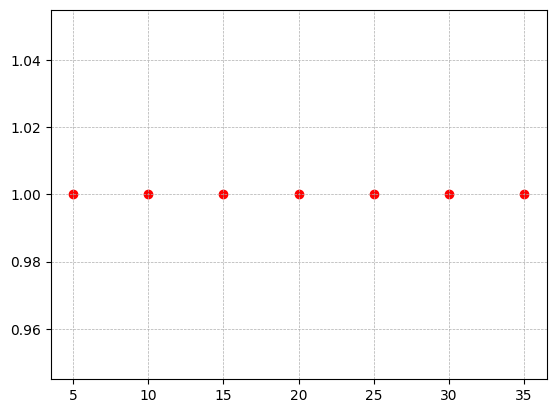

In [12]:
'''
Количество билетов на экзамене: 5, 10, 15, 20, 25, 30, 35.
Количество билетов, которые выучил студент: 1, 1, 1, 1, 1, 1, 1.
'''

data_a = [5, 10, 15, 20, 25, 30, 35]
data_b = [1, 1, 1, 1, 1, 1, 1]

plt.scatter(data_a, data_b, color='red')
plt.grid(color='#AEAEAE', linewidth=0.5, linestyle='--')
plt.show()

### Корреляция

In [13]:
data_corr = [1400, 1900, 1500, 1300, 1700, 1800]

mean = sum(data_corr)/len(data_corr)
print("Mean:", mean)

variance = sum((item - mean) ** 2 for item in data_corr) / (len(data_corr)-1)
print("Variance:", variance)

std = variance ** 0.5
print("Standard deviation:", std)

pearson_coeff = 600 / (2.9 * std)
print("Pearson coefficient:", pearson_coeff)

Mean: 1600.0
Variance: 56000.0
Standard deviation: 236.64319132398464
Pearson coefficient: 0.874297504891569


***Задача***

*Анализируем золото и акции высокорисковой компании. В аналитике обычно используют именно коэффициент корреляции, так что предлагаем довести анализ до конца.*

In [14]:
# У нас уже были ассеты раньше

print("Asset A:", asset_a)
print("Asset B:", asset_b)

Asset A: [300, 320, 290, 350, 310]
Asset B: [150, 120, 180, 90, 160]


In [15]:
# Вычисляем стандартные отклонения

print("Mean A:", mean_a)
print("Mean B:", mean_b)

variance_a = sum((item - mean_a) ** 2 for item in asset_a) / (len(asset_a)-1)
print("Variance:", variance)

std_a = variance_a ** 0.5
print("Standard deviation:", std)


variance_b = sum((item - mean_b) ** 2 for item in asset_b) / (len(asset_b)-1)
print("Variance:", variance)

std_b = variance_b ** 0.5
print("Standard deviation:", std)

pearson_ab = cov_ab / (std_a * std_b)
print("Pearson correlation:", pearson_ab)


Mean A: 314.0
Mean B: 140.0
Variance: 56000.0
Standard deviation: 236.64319132398464
Variance: 56000.0
Standard deviation: 236.64319132398464
Pearson correlation: -0.9521574310926244


### Сравнение категорий

***Задача***

*Рассмотрим данные, которые отражают время ожидания клиентов на обслуживание в двух разных отделениях банка в минутах.*

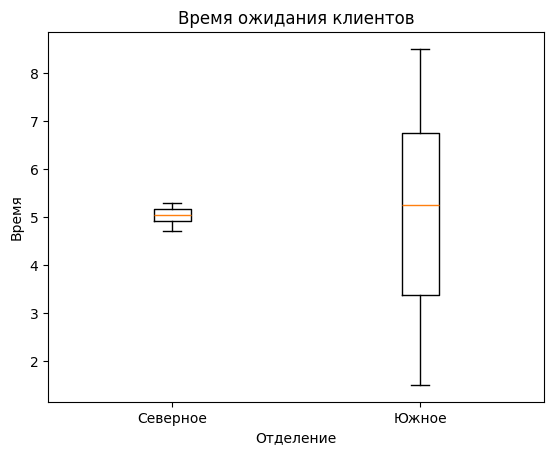

In [16]:
data_a = [4.7, 4.8, 4.9, 5.0, 5.0, 5.1, 5.1, 5.2, 5.2, 5.3]
data_b = [1.5, 2.0, 3.0, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 8.5]

plt.boxplot([data_a, data_b], tick_labels=["Северное", "Южное"])
plt.xlabel('Отделение')
plt.ylabel('Время')
plt.title('Время ожидания клиентов')
plt.show()


***Задача***

*Есть данные по ценам автомобиля с пробегом > 90 тыс.км и < 90 тыс.км.*

*Нужно построить box plot*

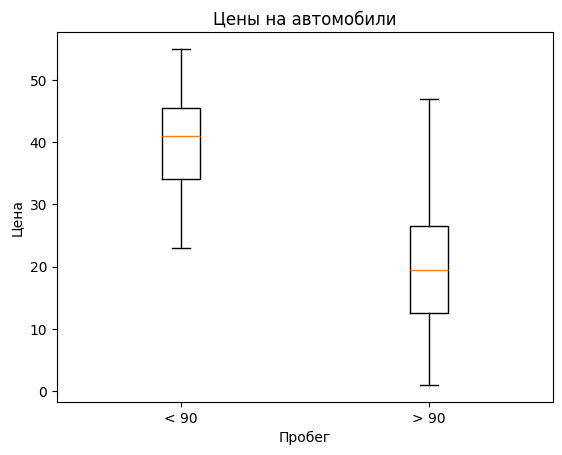

In [17]:
data_less90 = [23, 30, 33, 34, 34, 34, 35, 37, 39, 41, 41, 44, 45, 45, 45, 47, 48, 50, 52, 55]
data_over90 = [1, 2, 8, 11, 11, 13, 14,15, 17, 18, 21, 23, 23, 26, 26, 28, 29, 33, 39, 47]

plt.boxplot([data_less90, data_over90], tick_labels=['< 90', '> 90'])
plt.xlabel('Пробег')
plt.ylabel('Цена')
plt.title('Цены на автомобили')
plt.show()

***Задача***

*Компания «Модные подкрадули» занимается продажей обуви онлайн. Её аналитики исследуют данные о количестве покупок, совершаемых клиентами за один визит на сайт. Они хотят узнать распределение количества купленных пар обуви на одного клиента, чтобы лучше управлять предложением и оптимизировать маркетинговые стратегии.*

*Вот данные: [1, 1, 2, 3, 1, 4, 2, 1, 1, 1, 2, 1, 3],  где каждый элемент списка — это количество пар обуви, купленных одним клиентом за один визит на сайт.*

*Найдите вероятность того, что клиент купит как минимум 3 пары за один визит.* 

In [18]:
data_sneakers = [1, 1, 2, 3, 1, 4, 2, 1, 1, 1, 2, 1, 3]  # Данные

measures_amount: int = len(data_sneakers)  # Количество измерений
measures = [1, 2, 3, 4]  # Значения измерений, отсортированные по возрастанию
freqs: int = [7, 3, 2, 1]  # Частоты для каждого из значений

# Считаем значения функции вероятности
p_func: List = [i / measures_amount for i in freqs]  # Значения ф

# Считаем значения эмпирической функции распределения
p_empirical = []
p_empirical_current = 0
for i in p_func:
    p_empirical_current += i
    p_empirical.append(p_empirical_current)

# Промежуточные результаты
print("Количество измерений: ", measures_amount)
print("Измерения:", measures)
print("Частота каждого измерения: ", freqs)
print("Вероятность значений:", p_func)
print("Значения эмпирической функции", p_empirical)

# Считаем и выводим значение вероятности
p_more_3 = 1 - p_empirical[1]
print("Вероятность покупки:", p_more_3)

Количество измерений:  13
Измерения: [1, 2, 3, 4]
Частота каждого измерения:  [7, 3, 2, 1]
Вероятность значений: [0.5384615384615384, 0.23076923076923078, 0.15384615384615385, 0.07692307692307693]
Значения эмпирической функции [0.5384615384615384, 0.7692307692307692, 0.923076923076923, 1.0]
Вероятность покупки: 0.23076923076923084


## Распределение

### Нормальное распределение

***Задача***

*На новогоднем корпоративе руководитель компании устроил лотерею. Каждый сотрудник получил билет с номером от 100 до 999. В конце мероприятия случайным образом выбирался один билет из всех. Найдите вероятность того, что выигрышным окажется билет, номер которого не превышает значение 170.*

In [19]:
# Количество билетов
tickets_amount = 999 - 100 + 1
print("Количество билетов:", tickets_amount)

# Пороговый номер билета
ticket_threshold = 170

# Находим вероятность
p_ticket = (ticket_threshold - 100 + 1) / tickets_amount
print("Вероятность:", p_ticket)


Количество билетов: 900
Вероятность: 0.07888888888888888


### Математическое ожидание

***Задача***

*Представьте кубик, у которого 18 граней, а значения от 1 до 18 выпадают с равной вероятностью. Найдите математическое ожидание для числа, которое выпадет на таком кубике.* 

In [20]:
# Считаем математическое ожидание
math_expec = (1 + 18) / 2
print("Математическое ожидание:", math_expec)

# Сравним со выборочным средним
cube_mean: float = 0.0
for i in range(1, 19):
    cube_mean += i

cube_mean = cube_mean / len(range(1, 19))
print("Выборочное среднее:", cube_mean)

Математическое ожидание: 9.5
Выборочное среднее: 9.5


### Дисперсия

***Задача***

*Посчитать дисперсию для случайной величины «количество успешных стартапов», где n=10*


In [21]:
var_x = (10**2 - 1) / 12
print ("Дисперсия:", var_x)

std_x = var_x**0.5
print("Стандартное отклонение:", std_x)


Дисперсия: 8.25
Стандартное отклонение: 2.8722813232690143


***Задача***

*Предположим, что вы купили новую соковыжималку, но ваша собака съела инструкцию. Сколько апельсинов нужно на один литр сока — неизвестно, но вы оцениваете, что это количество должно составлять от 5 до 15 штук. Используя равномерное распределение, определите дисперсию такой случайной величины.*

In [22]:
def random_var_value(min: float, max: float) -> float:
    '''
    Количество значений случайной величины
    
    !TODO: add calculation when min and/or max is not integer
    '''
    return max - min + 1

In [23]:
oranges_amount = random_var_value(5, 15)

var_oranges = (oranges_amount**2 - 1) / 12
print("Дисперсия:", var_oranges)

std_oranges = var_oranges**0.5
print("Стандартное отклонение:", std_oranges)

Дисперсия: 10.0
Стандартное отклонение: 3.1622776601683795


***Задача***

*Вы решили открыть сервис по прогнозу погоды «Угадайка». Всё шло хорошо, пока не оказалось, что для одной северной столицы сложно научиться предсказывать количество ясных дней в году. Так, вам предлагается использовать равномерное распределение с параметрами a=10,b=130*

*В прошлом году было целых 96 солнечных дней, что является наилучшим результатом за последние 15 лет. Найдите вероятность того, что в следующем году это количество будет ещё больше.*

*Посчитайте математическое ожидание для данной случайной величины.*

*Посчитайте дисперсию для данной случайной величины*

In [24]:
weather_min = 10
weather_max = 130

target_weather_value = 96

n = weather_max - weather_min + 1

# Вероятность
p_weather = 1 - ((target_weather_value - weather_min + 1) / n)
print("Вероятность количества солнечных дней > 96:", p_weather)

# Математическое ожидание
expect_weather = (weather_min + weather_max) / 2
print("Матожидание количества солнечных дней:", expect_weather)

# Дисперсия
var_weather = (n**2 - 1) / 12
print("Дисперсия:", var_weather)

# Стандартное отклонение
std_weather = var_weather**0.5
print("Стандартное отклонение:", std_weather)


Вероятность количества солнечных дней > 96: 0.28099173553719003
Матожидание количества солнечных дней: 70.0
Дисперсия: 1220.0
Стандартное отклонение: 34.92849839314596


### Z-значения

***Задача***

Если случайная величина X имеет нормальное распределение с параметрами μ=12, σ=3, найдите z-оценку для значения x=9.

In [25]:
mu = 12
sigma = 3

target_x = 9

z = (target_x - mu) / sigma
print("Z-значение:", z)

Z-значение: -1.0


### Стандартное нормальное распределение

***Задача***    

*Давайте возьмём случайную величину «время, которое требуется домашнему коту для того, чтобы принять решение выйти на улицу или остаться дома, когда дверь открыта» (для сокращения записи будем использовать X). Предположим, что она имеет нормальное распределение с параметрами μ=20 секунд, σ=5 секунд. Вы проводите исследование и каждый день записываете соответствующее время. Используйте правило двух сигм, чтобы определить, в какие из дней кот нарушал свои привычки.*

In [26]:
cat_data = [19, 7, 11, 27, 31]
cat_mu = 20
cat_sigma = 5

lower_bound = cat_mu - 2 * cat_sigma
upper_bound = cat_mu + 2 * cat_sigma

print("Границы интервала:", (lower_bound, upper_bound))

break_habit_days: List = []
for item in cat_data:
    
    if item < lower_bound:
        break_habit_days.append(item)
    elif item > upper_bound:
        break_habit_days.append(item)
    else:
        pass

print("Значения, выбивающиеся из привычных", break_habit_days)

Границы интервала: (10, 30)
Значения, выбивающиеся из привычных [7, 31]


***Задача***

*Вы одолжили кота у своего друга и проводите похожее исследование. Ваш друг заявил, что для его кота правильно будет использовать параметры μ=30 и σ=3. Используйте стандартизацию и отметьте все значения, которые не попадают в интервал для 95% наиболее вероятных значений.*

In [27]:
cat_data = [31, 27, 29, 23, 30]

cat_mu = 30
cat_sigma = 3

cat_z = []
for item in cat_data:
    cat_z.append((item - cat_mu) / cat_sigma)

print("Z-значения:", cat_z)  # В интервал не попадает значение -2.33

Z-значения: [0.3333333333333333, -1.0, -0.3333333333333333, -2.3333333333333335, 0.0]


### Стандартная ошибка среднего

In [28]:
data = [270, 261, 250, 233, 286]

print("Среднее:", sum(data) / len(data))

Среднее: 260.0


***Задача***

*Проведём некий эксперимент 10 раз. Получились вот такие средние значения по выборкам:*

*[260, 255, 270, 260, 265, 270, 260, 255, 265, 260]*

*Вычислите стандартное отклонение для этих выборочных средних.*

In [29]:
data = [260, 255, 270, 260, 265, 270, 260, 255, 265, 260]

data_mean = sum(data) / len(data)
data_var = sum((item - data_mean)**2 for item in data) / (len(data) - 1)
data_std = data_var**0.5

print("Среднее:", data_mean)
print("Дисперсия:", data_var)
print("Стандартное отклонение:", data_std)

Среднее: 262.0
Дисперсия: 28.88888888888889
Стандартное отклонение: 5.374838498865699


## Центральная предельная теорема

***Задача***

*Экологи измерили уровень загрязнённости воздуха в 9 случайно выбранных точках города и получили следующие значения (в микрограммах на кубический метр):*

46, 37, 51, 47, 42, 39, 43, 46, 45.

*Вычислите среднюю концентрацию загрязнителей в воздухе на основе этих данных. В ответ введите число*


In [30]:
data_air = [46, 37, 51, 47, 42, 39, 43, 46, 45]

mean_data_air = sum(data_air) / len(data_air)
var_data_air = sum((item - mean_data_air)**2 for item in data_air) / (len(data_air) - 1)
std_data_air = var_data_air**0.5

print("Среднее:", mean_data_air)
print("Дисперсия:", var_data_air)
print("Стандартное отклонение:", std_data_air)

Среднее: 44.0
Дисперсия: 18.25
Стандартное отклонение: 4.272001872658765


***Задача***

*Вот что было с этими точками в предыдущие годы: согласно наблюдениям Гидрометцентра, стандартное отклонение в генеральной совокупности равнялось 5. Вычислите стандартную ошибку среднего.*

In [31]:
# Вычисляем стандартную ошибку среднего
variance_air = 5

SE = 5 / (len(data_air) ** 0.5)
print("Стандартная ошибка среднего:", SE)

Стандартная ошибка среднего: 1.6666666666666667


***Задача***

*На основе полученных данных из прошлых задач, где измерялся уровень загрязнённости воздуха (в микрограммах на кубический метр): 46, 37, 51, 47, 42, 39, 43, 46, 45, а среднее равно 44, вычислите стандартное отклонение для этой выборки*

In [32]:
var_data_air = sum((item - mean_data_air)**2 for item in data_air) / (len(data_air) - 1)
std_data_air = var_data_air**0.5
print("Стандартное отклонение:", std_data_air)

Стандартное отклонение: 4.272001872658765


## Статистические гипотезы

***Задача***

*Представим себя зоологами и исследуем массу животных. Есть предположения о средней массе разных существ и расчёты необходимых показателей. Выясните, есть ли основания отвергать гипотезу о средней массе животного. Для этого определите, будет ли значение z-статистики попадать в зону за пределами критических значений.*

In [33]:
def calculate_z_stat(mean, mean_gen, std, number):
    """
    Расчет Z-статистики

    Args:
        mean (float): Выборочное среднее
        mean_gen (float): Среднее генеральной совокупности
        std (float): Стандартное отклонение генеральной совокупности
        number (int): Количество наблюдений

    Returns:
        z_stat (float): Значение Z-статистики
    """

    # Стандартная ошибка среднего
    std_mean_err: float = std / (number**0.5)

    # Z-статистика
    z_stat = (mean - mean_gen) / std_mean_err

    return z_stat


    # Считаем значения из задачи

print("Случай 1:", calculate_z_stat(300, 309, 48, 64))
print("Случай 2:", calculate_z_stat(60, 55, 20, 100))
print("Случай 3:", calculate_z_stat(403, 410, 36, 225))
print("Случай 4:", calculate_z_stat(129, 125, 120, 400))


Случай 1: -1.5
Случай 2: 2.5
Случай 3: -2.916666666666667
Случай 4: 0.6666666666666666


### P-value

***Задача***

*В норме самец императорского пингвина весит 40 кг. Зоологи взвесили всех доступных им пингвинов, чтобы помочь выявить возможные угрозы здоровью пингвинов, связанные с изменением климата или человеческой деятельностью.*

*Вот какие данные используются в исследовании:*

- *предполагаемое среднее значение генеральной совокупности: 40*
- *стандартное отклонение генеральной совокупности: 10*
- *среднее значение по выборке: 36*
- *размер выборки: 64.*

*Сформулируем гипотезы:*

- *H0: μ=40*
- *H1: μ !=40*

*Будем использовать уровень значимости α=0.05*

*Рассчитайте значение z-статистики, подставьте его в калькулятор, получите p-value и сделайте вывод о том, есть ли отклонение от стандарта.*

In [34]:
mean_gen = 40
std_gen = 10
mean_select = 36
number = 64

z_stat = (mean_select - mean_gen) / (std_gen / (number**0.5))
print("Z-статистика:", z_stat)

# В калькуляторе получаем значение p-value = 0.001 -> отвергаем H0

Z-статистика: -3.2


***Задача***

*По утверждениям биологов, средний рост куста морошки в норме составляет 50 см. Для изучения влияния изменения климата на рост растений исследователи измерили все доступные им экземпляры морошки.*

*Вот данные, используемые в исследовании:*

- *предполагаемое среднее значение генеральной совокупности: 50*
- *стандартное отклонение генеральной совокупности: 18*
- *среднее значение по выборке: 53*
- *размер выборки: 49*

*Сформулируем гипотезы:*

- *H0: μ=50*
- *H1: μ!=50*

*Уровень значимости выберем α=0.05.*

*Рассчитайте значение z-статистики, подставьте его в калькулятор, получите p-value и сделайте вывод о том, есть ли отклонение от нормы.*

In [35]:
mean_gen = 50
std_gen = 18
mean_select = 53
number = 49

z_stat = (mean_select - mean_gen) / (std_gen / (number**0.5))
print("Z-статистика:", z_stat)

# Значение p-value из калькулятора 0.246 -> не отвергаем H0

Z-статистика: 1.1666666666666665


***Задача***

*Вычислите z-статистику по данным условиям, подставьте полученное значение z-статистики в калькулятор, получите p-value и сделайте вывод.*

*Гипотезы:*

- *H0: μ=48*
- *H1: μ!=48*

*Данные:*

- *α=0.05*
- *x=53*
- *σ=17*
- *n=100*

In [36]:
mean_gen = 48
std_gen = 17
mean_select = 53
number = 100

z_stat = (mean_select - mean_gen) / (std_gen / (number**0.5))
print("Z-статистика:", z_stat)

# Значение p-value = 0.003 -> отвергаем H0

Z-статистика: 2.9411764705882355


In [37]:
mean_gen = 300
std_gen = 80
mean_select = 311
number = 100

z_stat = (mean_select - mean_gen) / (std_gen / (number**0.5))
print("Z-статистика:", z_stat)

# Значение p-value = 0.168 -> не отвергаем H0

Z-статистика: 1.375


In [38]:
mean_gen = 67
std_gen = 24
mean_select = 77
number = 64

z_stat = (mean_select - mean_gen) / (std_gen / (number**0.5))
print("Z-статистика:", z_stat)

# Значение p-value = 0.001 -> отвергаем H0

Z-статистика: 3.3333333333333335


### T-распределение и T-критерий

#### Оценка стандартной ошибки

In [39]:
def ese(sx, n) -> float:
    return sx / (n**0.5)

In [40]:
print("ESE 1:", ese(47, 100))
print("ESE 2:", ese(12, 256))
print("ESE 3:", ese(12.4, 16))
print("ESE 4:", ese(4.9, 4))



ESE 1: 4.7
ESE 2: 0.75
ESE 3: 3.1
ESE 4: 2.45


***Задача***

*Вы хотите проверить гипотезу,  что средняя масса мешков с кофе, поставляемых поставщиком, равна 50 кг.*

*Сформулируем гипотезы так:*

- *H0: μ=50*
- *H1: μ!=50*

*Выбираем уровень значимости α=0.05.*

*Работник склада последовательно взвесил 40 мешков с кофе, которые к вам приехали. Среднее значение по этой выборке: 50.2 кг. Стандартное отклонение: 0.5 кг.*

*Вычислите t-статистику и количество степеней свободы.*

In [ ]:
n: int = 40
mean_sel: float = 50.2
std_sel: float = 0.5
mean_gen_estimated: float = 50


# Считаем ESE
print("ESE:", ese(std_sel, n))

# Считаем t-статистику
t_stat = (mean_sel - mean_gen_estimated) / ese(std_sel, n)
print("t-статистика:", t_stat)

# Степени свободы
df = n - 1
print("Количество степеней свободы:", df)

# Считаем p-value в калькуляторе: p-value = 0.018 -> отвергаем H0

ESE: 0.07905694150420949
t-статистика: 2.5298221281347395
Количество степеней свободы: 39


***Задача***

Рассмотрим уровень загрязнённости воздуха в 9 случайно выбранных точках города.

Данные наблюдений: 46, 37, 51, 47, 42, 39, 43, 46, 45. 

Стандартное отклонение по этой выборке: SX=4.27. 

Вычислите оценку стандартной ошибки (ESE) для такого набора измерений. 

In [44]:
data: list[int] = [46, 37, 51, 47, 42, 39, 43, 46, 45]

std_sel = 4.27
n = len(data)

print("ESE:", ese(std_sel, n))

ESE: 1.4233333333333331


***Задача***

Допустим, вы производите электрические самокаты и хотите проверить гипотезу, что среднее время зарядки батареи самоката составляет 3 часа.

Сформулируем гипотезы в следующем виде:

- H0: μ=3
- H1: μ!=3

Выбираем уровень значимости α=0.05

Всего у нас 20 самокатов.

Среднее значение по этой выборке: 3.1 часа.

Стандартное отклонение: SX=0.15 часа.

Вычислите оценку стандартной ошибки среднего. Вычислите t-статистику.


In [ ]:
n = 20
mean_sel = 3.1
std_sel = 0.15
mean_gen_estimated = 3

print("Стандартная ошибка среднего:", ese(std_sel, n))

t_stat = (mean_sel - mean_gen_estimated) / ese(std_sel, n)
print("t-статистика:", t_stat)

df = n - 1
print("Степени свободы:", df)

t = (3.1 - 3) / 0.03
print("ESE, расчитанная вручную", t)

# p-value = 0.004 -> отвергаем H0

Стандартная ошибка среднего: 0.03354101966249684
t-статистика: 2.9814239699997227
Степени свободы: 19
ESE, расчитанная вручную 3.3333333333333366


***Задача***

Допустим, вы работаете в авиакомпании и хотите проверить гипотезу, что средняя задержка рейсов вашей компании составляет 15 минут.

Сформулируем в следующем виде:

- H0: μ=15
- H1: μ!=15

Выбираем уровень значимости α=0.05

И так далее, всего у нас 50 рейсов.

Среднее значение по этой выборке: x=15.3 минуты.
Стандартное отклонение: SX=1.5 минуты.

Рассчитайте t-статистику и количество степеней свободы. Оцените значение p-value.

In [ ]:
n = 50
mean_sel = 15.3
std_sel = 1.5
mean_gen_estimated = 15

print("Стандартная ошибка среднего:", ese(std_sel, n))

t_stat = (mean_sel - mean_gen_estimated) / ese(std_sel, n)
print("t-статистика:", t_stat)

df = n - 1
print("Степени свободы:", df)

t = (15.3 - 15)/0.21
t

# p-value = 0.164 -> Не отклоняем гипотезу

Стандартная ошибка среднего: 0.21213203435596426
t-статистика: 1.4142135623730985
Степени свободы: 49


1.428571428571432